# Regression with Neural Networks with Tensorflow
Predicting a numerical variable based on some other combination of variables.

In [1]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

2024-03-08 20:37:19.158525: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-08 20:37:19.190563: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-08 20:37:19.190597: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-08 20:37:19.191314: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-08 20:37:19.196215: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-08 20:37:19.196887: I tensorflow/core/platform/cpu_feature_guard.cc:1

'2.15.0'

## Creating data to view and fit

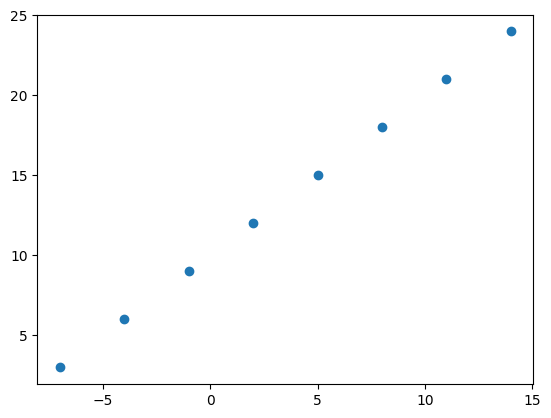

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize 
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(-7.0, 3.0)

In [10]:
# Turn NumPy arrays into tensors
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

(TensorShape([8]), TensorShape([8]))

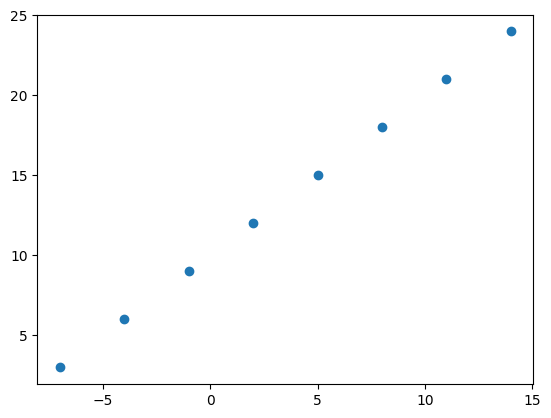

In [12]:
plt.scatter(X, y)

## Steps in modeling with tensorflow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define a loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learing) and evaluation metrics (what we can use to interpret the preformance of our model).
3. Fitting a model - letting the model try to find patterns between X and y (features and labels).

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 219ms/step - loss: 14.5964 - mae: 14.5964
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 14.4639 - mae: 14.4639
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 14.3314 - mae: 14.3314
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 14.1989 - mae: 14.1989
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 14.0664 - mae: 14.0664


In [14]:
# Check out X and Y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 59ms/step


array([[-2.300456]], dtype=float32)

In [16]:
y_pred + 9.28

array([[6.9795437]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. Creating a model - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. Compiling a model - here we might change the optimization function or perhaps the learning rate of the optimization function.
3. Fitting a model - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [17]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 188ms/step - loss: 14.1406 - mae: 14.1406
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 14.0081 - mae: 14.0081
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 13.8756 - mae: 13.8756
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 13.7431 - mae: 13.7431
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 13.6106 - mae: 13.6106
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 13.4781 - mae: 13.4781
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 13.3456 - mae: 13.3456
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 13.2131 - mae: 13.2131
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 13.0806 - mae: 13.0806
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 12.9481 - mae: 12.9481
Epoch 11/100
1/1 [==============================] - 0s 6m

In [18]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Let's see if our model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 45ms/step


array([[29.903563]], dtype=float32)

In [20]:
# Rebuild model adding a hidden layer in a model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 249ms/step - loss: 13.0670 - mae: 13.0670
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 12.5091 - mae: 12.5091
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.9426 - mae: 11.9426
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 11.3719 - mae: 11.3719
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.7852 - mae: 10.7852
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1750 - mae: 10.1750
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 9.5421 - mae: 9.5421
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 8.8864 - mae: 8.8864
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 8.1906 - mae: 8.1906
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 7.4476 - mae: 7.4476
Epoch 11/100
1/1 [==============================] - 0s 6ms/step -

In [21]:
# Let's see prediction after adding a hidden layer
model.predict([17.0])

1/1 [==============================] - 0s 50ms/step


array([[31.231045]], dtype=float32)

In [22]:
# Rebuild model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 330ms/step - loss: 14.1588 - mae: 14.1588
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 13.5007 - mae: 13.5007
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 12.8492 - mae: 12.8492
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 12.2022 - mae: 12.2022
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 11.5576 - mae: 11.5576
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9126 - mae: 10.9126
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.2643 - mae: 10.2643
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 9.6095 - mae: 9.6095
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 8.9454 - mae: 8.9454
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 8.2692 - mae: 8.2692
Epoch 11/100
1/1 [==============================] - 0s 6ms/step

In [23]:
model.predict([17])

1/1 [==============================] - 0s 53ms/step


array([[27.25307]], dtype=float32)

### Learning rate is one of most important parameters in netural networks